In [14]:
#Set up dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json 
from config import api_key
from pprint import pprint

In [15]:
# Use Pandas to pull in data to create DataFrames
#Use Pandas to 
Pet_Set1= pd.read_csv("./Data/animal-data-1.csv")
Seattle_Pet= pd.read_csv("./Data/Seattle_Pet_Licenses.csv")
Pet_Set1.head()
Cleaned_Pet1 = Pet_Set1.drop_duplicates(subset="id")
Cleaned_Pet1
# Pet_Set1["deceaseddate"].value_counts()
# Cleaned_PetSet = Pet_Set1.dropna()


,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
5,31469,2013-03-26 00:00:00,Incompatible with owner lifestyle,0,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,2013-03-30 00:00:00,Adoption,0.0,2017-05-08 00:00:00,Incompatible with owner lifestyle,NaN,Died in care,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,981020029330984,Max,Domestic Medium Hair,Orange and White,Cat,...,2019-08-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10286,64588,2019-08-27 18:14:11,Stray,0,C19081418,981020033133599,Punkin,Domestic Short Hair,Calico,Cat,...,2019-08-28 00:00:00,Foster,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10287,64606,2019-08-29 12:10:21,Stray,0,D19081440,0A1243400C,Dozer,Coonhound,Red,Dog,...,2019-08-29 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10288,64608,2019-08-29 18:58:06,Stray,0,D19081421,982000363034690,Lucy Farmer,Beagle,Tricolour,Dog,...,2019-08-30 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0


In [24]:
# Determine which animals are most common in an animal shelter?

Question1 = Pet_Set1[['speciesname']].value_counts().rename_axis("speciesname").reset_index(name="Pet Count").set_index("speciesname")
Question1

# Question1.head(25)

,Pet Count
speciesname,
Cat,5749
Dog,3900
House Rabbit,218
Rat,130
Guinea Pig,93
Bird,38
Livestock,18
Hamster,17
Hedgehog,15


In [21]:
# #Create Labels for Pie Chart
# labels = ["Cat", "Dog", "House Rabbit", "Rat", "Guinea Pig", "Bird"]
# #Set values for Pie Chart
# sizes = 
# plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True)

Text(0, 0.5, '')

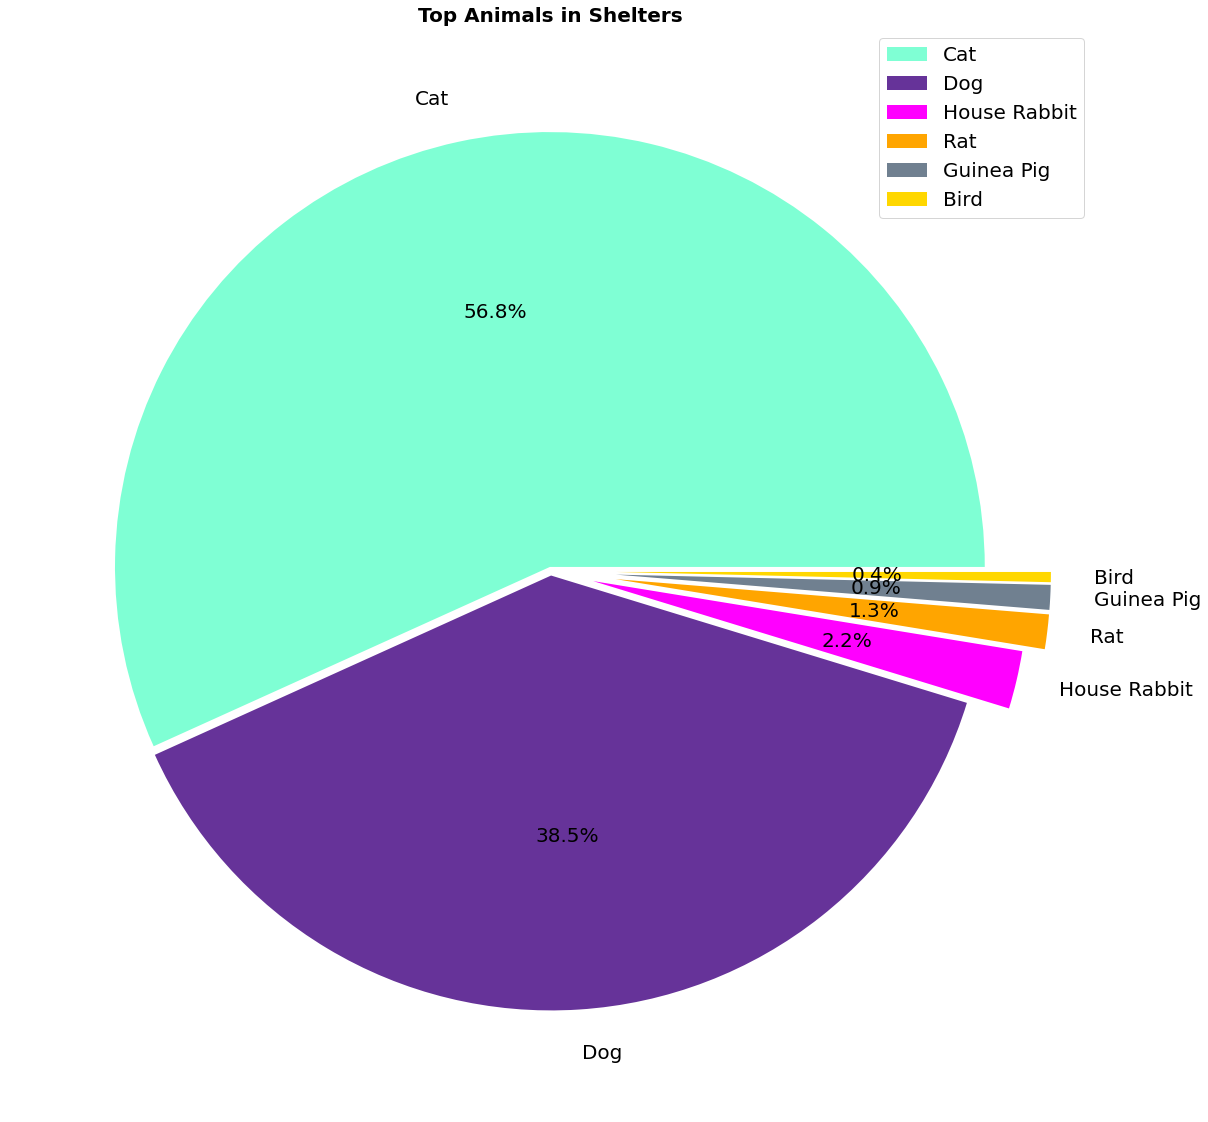

In [42]:
# Create Pie Chart
colors=["aquamarine", "rebeccapurple", "fuchsia", "orange", "slategray", "gold"]
explode = [0.01, 0.01, 0.1, 0.15, 0.15, 0.15]
Question1.head(6).plot(kind="pie", y="Pet Count", figsize=(30,20),autopct="%1.1f%%", colors=colors, fontsize=20, explode=explode)
plt.title("Top Animals in Shelters",fontsize=20, fontweight="bold")
plt.legend(prop={"size":20})
plt.ylabel("")

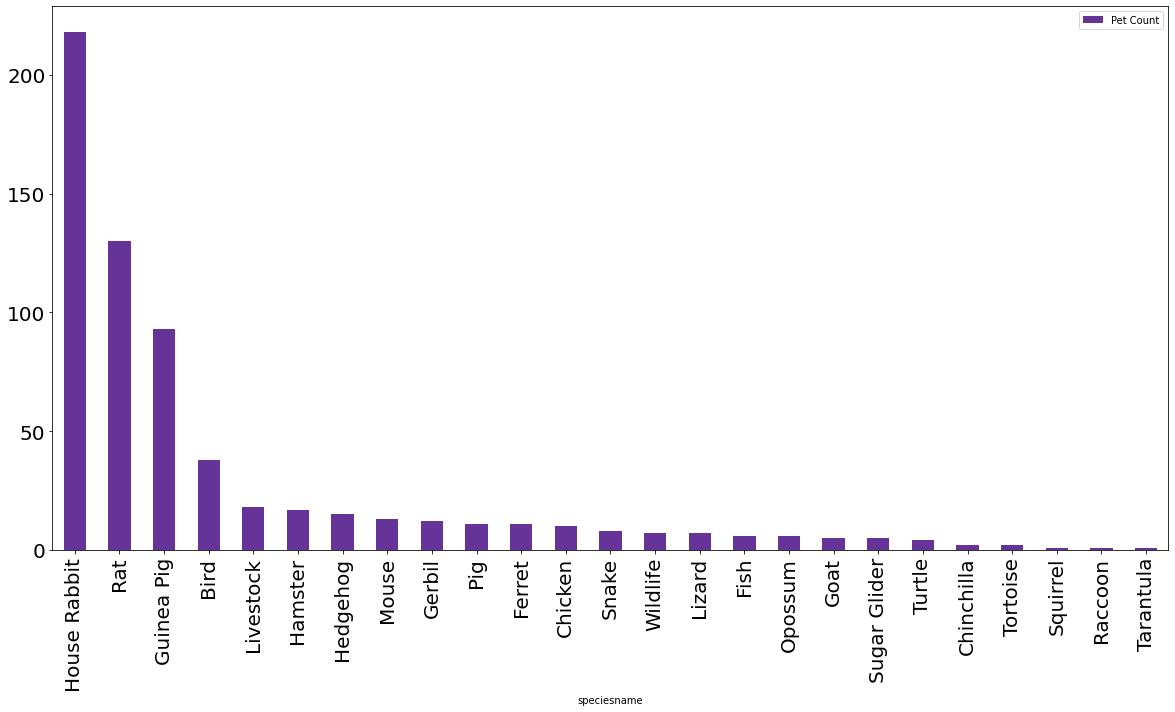

In [62]:
#Create Bar Graph representing animals that are NOT cats or dogs
Question1b = Question1.drop(index=["Cat","Dog"])
color=("rebeccapurple")
# N = 13
# Question1b = pd.Series(np.random.randint(10,50,N), index=np.arange(1,N+1))

# cmap = plt.cm.tab10
# colors = cmap(np.arange(len(Question1b)) % cmap.N)
# Question1b.plot.bar(color=colors)


fig1=Question1b.plot(kind="bar", figsize=(20,10), fontsize=20, color=color)
plt.title("Top Animals in Shelters",fontsize=20, fontweight="bold")
plt.legend(prop={"size":20})
plt.ylabel("")
# for bar in fig1:
#     speciesname.text(
#       bar.get_x() + bar.get_width() / 2,
#       bar.get_height() + 0.3,
#       round(bar.get_height(), 1),
#       horizontalalignment='center',
#       color=bar_color,
#       weight='bold'
#   )

# fig1



In [21]:
Seattle_Pet['Species'].value_counts()

Dog     32033
Cat     14683
Goat       29
Pig         3
Name: Species, dtype: int64